In [1]:
import random
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Load the list of possible words from the file
with open('Dataset/reduced_possible_words.txt', 'r') as file:
    possible_words = [line.strip() for line in file]

# Load the list of words for testing from the file
with open('Dataset/prev_words_chr.txt', 'r') as file:
    testing_set = [line.strip() for line in file]

In [3]:
# Define feedback symbols
MISS = "⬛"
MISPLACED = "🟨"
EXACT = "🟩"

In [4]:
# Function to evaluate a guess based on feedback
def evaluate_guess(secret_word, guess):
    guess_copy = guess
    feedback = []
    remaining_secret_letters = list(secret_word)
    # First, check exact matches (greens)
    for i, (g1, g2) in enumerate(zip(secret_word, guess_copy)):
        if g1 == g2:
            feedback.append("🟩")
            remaining_secret_letters.remove(g1)
            guess_copy = guess_copy[:i] + "🟩" + guess_copy[i+1:]
        else:
            feedback.append("⬛")
    feedback_str = "".join(feedback)
    # Then, check letters but not in location (yellows)
    for i, g2 in enumerate(guess_copy):
        if g2 in remaining_secret_letters:
            feedback_str = feedback_str[:i] + "🟨" + feedback_str[i+1:]
            remaining_secret_letters.remove(g2)
    feedback = feedback_str
    return "".join(feedback)

In [5]:
# Function to generate a random word from the list of possible words
def choose_random_word(list):
    word = random.choice(possible_words)
    while word in list: word = random.choice(possible_words)
    return word

In [6]:
# Bayesian algorithm for word selection
def bayesian_choose_word(possible_words, previous_guesses):
    scores = {word: 0 for word in possible_words}
    for word in possible_words:
        for guess, feedback in previous_guesses:
            guess_feedback = evaluate_guess(word, guess)
            if guess_feedback == feedback:
                scores[word] += 1
    best_words = [word for word, score in scores.items() if score == max(scores.values())]
    return random.choice(best_words)

In [7]:
# Training phase
training_set_size = 1000  # Adjust as needed
training_set = []
training_set = [choose_random_word(training_set) for _ in range(training_set_size)]
training_attempts = []

great_starting_word = []
great_starting_word_attempts = float('inf')

word = 0
the_word = None

for target_word in training_set:
    attempts = 0
    previous_guesses = []
    word += 1
    print(f"word #{word}: {target_word}")
    
    while True:
        attempts += 1
        guess = bayesian_choose_word(possible_words, previous_guesses)
        
        if attempts == 1:
            the_word = guess
        # elif attempts == 2:
        #     the_word = guess
        
        feedback = evaluate_guess(target_word, guess)
        previous_guesses.append((guess, feedback))
        if target_word == guess:
            print(f"attempt: {attempts}")
            training_attempts.append(attempts)
            
            if attempts < 3:
                great_starting_word.append(the_word)
                # great_starting_word_attempts = attempts
            break

word #1: other
attempt: 4
word #2: labor
attempt: 4
word #3: rearm
attempt: 4
word #4: suing
attempt: 4
word #5: leave
attempt: 5
word #6: flask
attempt: 5
word #7: cheek
attempt: 4
word #8: theta
attempt: 3
word #9: email
attempt: 5
word #10: bench
attempt: 3
word #11: farce
attempt: 6
word #12: abate
attempt: 5
word #13: share
attempt: 6
word #14: drunk
attempt: 5
word #15: stomp
attempt: 5
word #16: bushy
attempt: 5
word #17: agape
attempt: 4
word #18: tough
attempt: 5
word #19: flush
attempt: 4
word #20: guilt
attempt: 4
word #21: purge
attempt: 5
word #22: hunky
attempt: 4
word #23: anger
attempt: 3
word #24: chill
attempt: 5
word #25: thing
attempt: 4
word #26: built
attempt: 4
word #27: salty
attempt: 3
word #28: ficus
attempt: 4
word #29: omega
attempt: 3
word #30: realm
attempt: 5
word #31: felon
attempt: 3
word #32: dwell
attempt: 4
word #33: blurt
attempt: 4
word #34: built
attempt: 3
word #35: state
attempt: 3
word #36: putty
attempt: 3
word #37: noise
attempt: 4
word #38: 

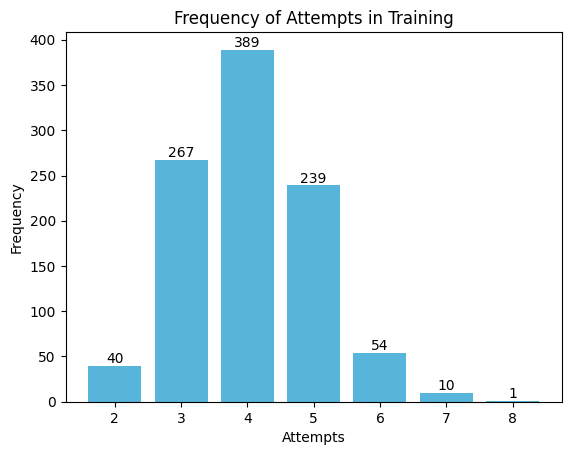

In [8]:
# Training Data Graph
unique_elements, counts = [], []

for item in set(training_attempts):
    unique_elements.append(item)
    counts.append(training_attempts.count(item))

plt.bar(unique_elements, counts, color='#57b5dc')

for i, count in enumerate(counts):
    plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Attempts')
plt.ylabel('Frequency')
plt.title('Frequency of Attempts in Training')

plt.show()

In [11]:
top_ten_words = []
word_count = 0

def load_letter_frequencies(csv_path):
    letter_frequencies = {}
    with open(csv_path, 'r') as csvfile:
        next(csvfile)
        for row in csvfile:
            letter, frequency = row.strip().split(',')
            letter_frequencies[letter.lower()] = float(frequency)
    return letter_frequencies

def evaluate_word(word, letter_frequencies, repeat_penalty=5):
    # Calculate the frequency of each letter in the given word
    word_frequencies = Counter(word.lower())
    
    # Calculate the score for the word based on letter frequencies
    score = 0
    for letter in word_frequencies:
        score += letter_frequencies[letter] * word_frequencies[letter]
        
        # Apply penalty for repeated letters
        if word_frequencies[letter] > 1:
            score -= repeat_penalty * (word_frequencies[letter] - 1) * letter_frequencies[letter]
    return score

english_letter_frequencies = load_letter_frequencies('Dataset/letter_frequency.csv')

scores = {word: evaluate_word(word, english_letter_frequencies) for word in great_starting_word}
# best_word = max(scores, key=scores.get)

# Sort the words based on their scores in descending order
sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Display the results
print("Word Scores:")
for word, score in sorted_words:
    print(f"{word}: {score}")
    word_count+=1
    if word_count<=10:
        top_ten_words.append(word)

# print("\nBest Word for the First Word in Wordle:")
# print(sorted_words[0][0])

Word Scores:
alert: 39.937
sedan: 38.198
wrote: 37.611999999999995
trial: 34.201
false: 33.449
glare: 32.896
amuse: 32.36
nadir: 32.122
plier: 31.609
spice: 30.706000000000003
prime: 29.990000000000002
cover: 29.956000000000003
ranch: 29.779
given: 29.41
hairy: 29.188
savor: 28.966
amble: 28.792
final: 28.134999999999998
shiny: 28.11
court: 28.089999999999996
decry: 27.697999999999997
dingo: 27.490000000000002
shirk: 27.146
botch: 26.931
slack: 23.072999999999997
dingy: 21.957
blitz: 21.613000000000003
surly: 21.071
modem: 17.244
dried: 12.896
rower: 4.607999999999997
otter: -0.9719999999999942
rigid: -8.642999999999997
manga: -13.331000000000003
ether: -16.968999999999994
scree: -23.009999999999998
belle: -48.68899999999999
teeth: -59.18
tepee: -77.929


list #0 word #1: gusto
attempt: 3
list #0 word #2: steer
attempt: 3
list #0 word #3: frock
attempt: 4
list #0 word #4: turbo
attempt: 3
list #0 word #5: bland
attempt: 5
list #0 word #6: fifty
attempt: 4
list #0 word #7: newly
attempt: 5
list #0 word #8: water
attempt: 4
list #0 word #9: hyper
attempt: 5
list #0 word #10: vicar
attempt: 4
list #0 word #11: ghoul
attempt: 3
list #0 word #12: leapt
attempt: 5
list #0 word #13: spoil
attempt: 4
list #0 word #14: soggy
attempt: 6
list #0 word #15: grime
attempt: 4
list #0 word #16: radio
attempt: 5
list #0 word #17: outgo
attempt: 5
list #0 word #18: naval
attempt: 5
list #0 word #19: flush
attempt: 3
list #0 word #20: mower
attempt: 7
list #0 word #21: clump
attempt: 5
list #0 word #22: notch
attempt: 3
list #0 word #23: valid
attempt: 4
list #0 word #24: lease
attempt: 6
list #0 word #25: hippy
attempt: 5
list #0 word #26: needy
attempt: 5
list #0 word #27: groin
attempt: 3
list #0 word #28: mouse
attempt: 5
list #0 word #29: chick
attem

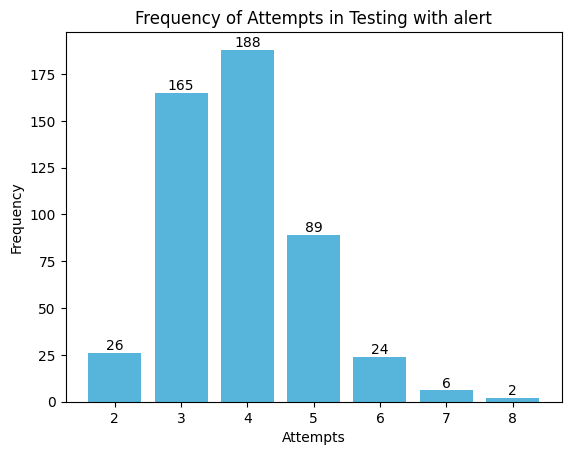

list #1 word #1: gusto
attempt: 3
list #1 word #2: steer
attempt: 4
list #1 word #3: frock
attempt: 4
list #1 word #4: turbo
attempt: 4
list #1 word #5: bland
attempt: 4
list #1 word #6: fifty
attempt: 4
list #1 word #7: newly
attempt: 3
list #1 word #8: water
attempt: 4
list #1 word #9: hyper
attempt: 5
list #1 word #10: vicar
attempt: 5
list #1 word #11: ghoul
attempt: 4
list #1 word #12: leapt
attempt: 5
list #1 word #13: spoil
attempt: 5
list #1 word #14: soggy
attempt: 4
list #1 word #15: grime
attempt: 3
list #1 word #16: radio
attempt: 2
list #1 word #17: outgo
attempt: 4
list #1 word #18: naval
attempt: 5
list #1 word #19: flush
attempt: 4
list #1 word #20: mower
attempt: 7
list #1 word #21: clump
attempt: 4
list #1 word #22: notch
attempt: 4
list #1 word #23: valid
attempt: 4
list #1 word #24: lease
attempt: 4
list #1 word #25: hippy
attempt: 5
list #1 word #26: needy
attempt: 2
list #1 word #27: groin
attempt: 4
list #1 word #28: mouse
attempt: 5
list #1 word #29: chick
attem

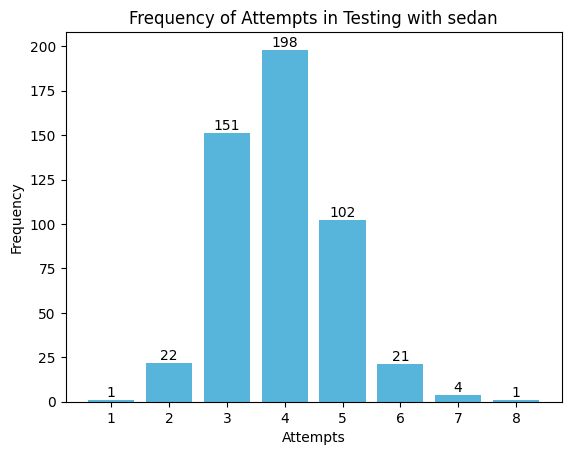

list #2 word #1: gusto
attempt: 4
list #2 word #2: steer
attempt: 3
list #2 word #3: frock
attempt: 3
list #2 word #4: turbo
attempt: 3
list #2 word #5: bland
attempt: 6
list #2 word #6: fifty
attempt: 3
list #2 word #7: newly
attempt: 3
list #2 word #8: water
attempt: 2
list #2 word #9: hyper
attempt: 4
list #2 word #10: vicar
attempt: 3
list #2 word #11: ghoul
attempt: 4
list #2 word #12: leapt
attempt: 5
list #2 word #13: spoil
attempt: 5
list #2 word #14: soggy
attempt: 6
list #2 word #15: grime
attempt: 3
list #2 word #16: radio
attempt: 4
list #2 word #17: outgo
attempt: 4
list #2 word #18: naval
attempt: 4
list #2 word #19: flush
attempt: 4
list #2 word #20: mower
attempt: 4
list #2 word #21: clump
attempt: 4
list #2 word #22: notch
attempt: 3
list #2 word #23: valid
attempt: 3
list #2 word #24: lease
attempt: 5
list #2 word #25: hippy
attempt: 3
list #2 word #26: needy
attempt: 3
list #2 word #27: groin
attempt: 5
list #2 word #28: mouse
attempt: 5
list #2 word #29: chick
attem

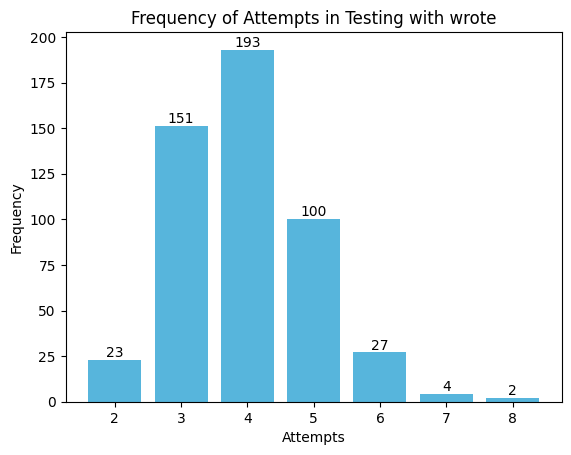

list #3 word #1: gusto
attempt: 3
list #3 word #2: steer
attempt: 4
list #3 word #3: frock
attempt: 4
list #3 word #4: turbo
attempt: 4
list #3 word #5: bland
attempt: 4
list #3 word #6: fifty
attempt: 4
list #3 word #7: newly
attempt: 3
list #3 word #8: water
attempt: 3
list #3 word #9: hyper
attempt: 5
list #3 word #10: vicar
attempt: 3
list #3 word #11: ghoul
attempt: 5
list #3 word #12: leapt
attempt: 3
list #3 word #13: spoil
attempt: 4
list #3 word #14: soggy
attempt: 5
list #3 word #15: grime
attempt: 6
list #3 word #16: radio
attempt: 4
list #3 word #17: outgo
attempt: 4
list #3 word #18: naval
attempt: 4
list #3 word #19: flush
attempt: 5
list #3 word #20: mower
attempt: 4
list #3 word #21: clump
attempt: 5
list #3 word #22: notch
attempt: 4
list #3 word #23: valid
attempt: 3
list #3 word #24: lease
attempt: 5
list #3 word #25: hippy
attempt: 5
list #3 word #26: needy
attempt: 4
list #3 word #27: groin
attempt: 3
list #3 word #28: mouse
attempt: 5
list #3 word #29: chick
attem

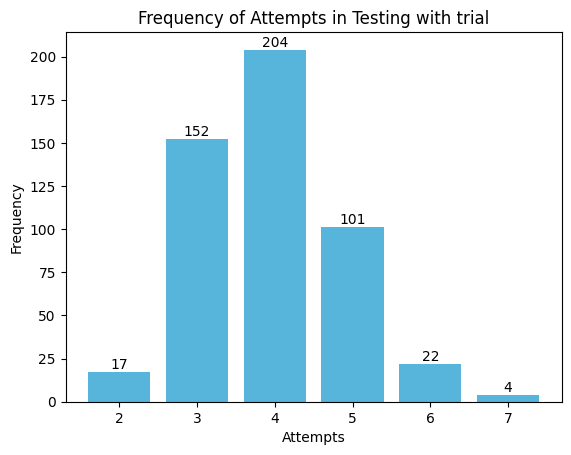

list #4 word #1: gusto
attempt: 4
list #4 word #2: steer
attempt: 5
list #4 word #3: frock
attempt: 3
list #4 word #4: turbo
attempt: 5
list #4 word #5: bland
attempt: 5
list #4 word #6: fifty
attempt: 3
list #4 word #7: newly
attempt: 4
list #4 word #8: water
attempt: 5
list #4 word #9: hyper
attempt: 5
list #4 word #10: vicar
attempt: 4
list #4 word #11: ghoul
attempt: 4
list #4 word #12: leapt
attempt: 5
list #4 word #13: spoil
attempt: 5
list #4 word #14: soggy
attempt: 5
list #4 word #15: grime
attempt: 4
list #4 word #16: radio
attempt: 5
list #4 word #17: outgo
attempt: 4
list #4 word #18: naval
attempt: 3
list #4 word #19: flush
attempt: 3
list #4 word #20: mower
attempt: 3
list #4 word #21: clump
attempt: 4
list #4 word #22: notch
attempt: 4
list #4 word #23: valid
attempt: 3
list #4 word #24: lease
attempt: 2
list #4 word #25: hippy
attempt: 3
list #4 word #26: needy
attempt: 3
list #4 word #27: groin
attempt: 3
list #4 word #28: mouse
attempt: 5
list #4 word #29: chick
attem

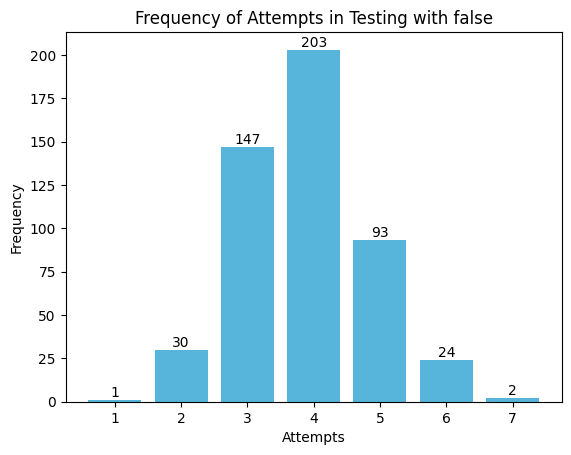

list #5 word #1: gusto
attempt: 3
list #5 word #2: steer
attempt: 7
list #5 word #3: frock
attempt: 4
list #5 word #4: turbo
attempt: 4
list #5 word #5: bland
attempt: 4
list #5 word #6: fifty
attempt: 5
list #5 word #7: newly
attempt: 4
list #5 word #8: water
attempt: 4
list #5 word #9: hyper
attempt: 5
list #5 word #10: vicar
attempt: 4
list #5 word #11: ghoul
attempt: 3
list #5 word #12: leapt
attempt: 4
list #5 word #13: spoil
attempt: 3
list #5 word #14: soggy
attempt: 5
list #5 word #15: grime
attempt: 2
list #5 word #16: radio
attempt: 3
list #5 word #17: outgo
attempt: 3
list #5 word #18: naval
attempt: 6
list #5 word #19: flush
attempt: 3
list #5 word #20: mower
attempt: 4
list #5 word #21: clump
attempt: 3
list #5 word #22: notch
attempt: 4
list #5 word #23: valid
attempt: 4
list #5 word #24: lease
attempt: 3
list #5 word #25: hippy
attempt: 4
list #5 word #26: needy
attempt: 4
list #5 word #27: groin
attempt: 5
list #5 word #28: mouse
attempt: 4
list #5 word #29: chick
attem

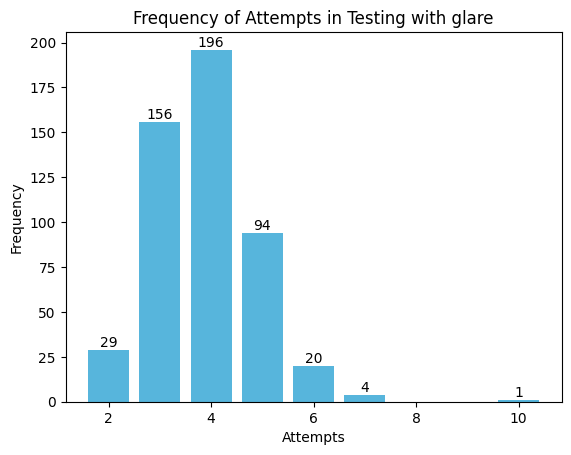

list #6 word #1: gusto
attempt: 4
list #6 word #2: steer
attempt: 5
list #6 word #3: frock
attempt: 5
list #6 word #4: turbo
attempt: 3
list #6 word #5: bland
attempt: 5
list #6 word #6: fifty
attempt: 5
list #6 word #7: newly
attempt: 4
list #6 word #8: water
attempt: 6
list #6 word #9: hyper
attempt: 4
list #6 word #10: vicar
attempt: 4
list #6 word #11: ghoul
attempt: 3
list #6 word #12: leapt
attempt: 4
list #6 word #13: spoil
attempt: 3
list #6 word #14: soggy
attempt: 4
list #6 word #15: grime
attempt: 3
list #6 word #16: radio
attempt: 6
list #6 word #17: outgo
attempt: 5
list #6 word #18: naval
attempt: 5
list #6 word #19: flush
attempt: 7
list #6 word #20: mower
attempt: 4
list #6 word #21: clump
attempt: 3
list #6 word #22: notch
attempt: 4
list #6 word #23: valid
attempt: 3
list #6 word #24: lease
attempt: 2
list #6 word #25: hippy
attempt: 4
list #6 word #26: needy
attempt: 3
list #6 word #27: groin
attempt: 4
list #6 word #28: mouse
attempt: 2
list #6 word #29: chick
attem

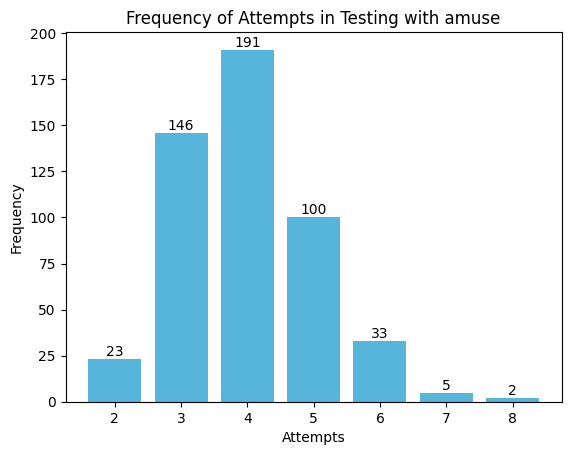

list #7 word #1: gusto
attempt: 3
list #7 word #2: steer
attempt: 4
list #7 word #3: frock
attempt: 3
list #7 word #4: turbo
attempt: 3
list #7 word #5: bland
attempt: 2
list #7 word #6: fifty
attempt: 4
list #7 word #7: newly
attempt: 3
list #7 word #8: water
attempt: 8
list #7 word #9: hyper
attempt: 5
list #7 word #10: vicar
attempt: 4
list #7 word #11: ghoul
attempt: 4
list #7 word #12: leapt
attempt: 4
list #7 word #13: spoil
attempt: 3
list #7 word #14: soggy
attempt: 3
list #7 word #15: grime
attempt: 3
list #7 word #16: radio
attempt: 3
list #7 word #17: outgo
attempt: 4
list #7 word #18: naval
attempt: 2
list #7 word #19: flush
attempt: 5
list #7 word #20: mower
attempt: 6
list #7 word #21: clump
attempt: 4
list #7 word #22: notch
attempt: 4
list #7 word #23: valid
attempt: 2
list #7 word #24: lease
attempt: 4
list #7 word #25: hippy
attempt: 4
list #7 word #26: needy
attempt: 2
list #7 word #27: groin
attempt: 2
list #7 word #28: mouse
attempt: 4
list #7 word #29: chick
attem

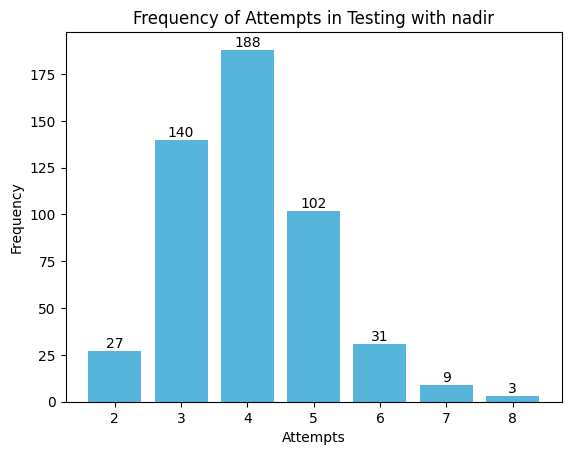

list #8 word #1: gusto
attempt: 3
list #8 word #2: steer
attempt: 4
list #8 word #3: frock
attempt: 5
list #8 word #4: turbo
attempt: 4
list #8 word #5: bland
attempt: 4
list #8 word #6: fifty
attempt: 5
list #8 word #7: newly
attempt: 3
list #8 word #8: water
attempt: 5
list #8 word #9: hyper
attempt: 4
list #8 word #10: vicar
attempt: 3
list #8 word #11: ghoul
attempt: 5
list #8 word #12: leapt
attempt: 3
list #8 word #13: spoil
attempt: 3
list #8 word #14: soggy
attempt: 5
list #8 word #15: grime
attempt: 4
list #8 word #16: radio
attempt: 4
list #8 word #17: outgo
attempt: 4
list #8 word #18: naval
attempt: 4
list #8 word #19: flush
attempt: 4
list #8 word #20: mower
attempt: 6
list #8 word #21: clump
attempt: 3
list #8 word #22: notch
attempt: 3
list #8 word #23: valid
attempt: 2
list #8 word #24: lease
attempt: 5
list #8 word #25: hippy
attempt: 3
list #8 word #26: needy
attempt: 4
list #8 word #27: groin
attempt: 4
list #8 word #28: mouse
attempt: 5
list #8 word #29: chick
attem

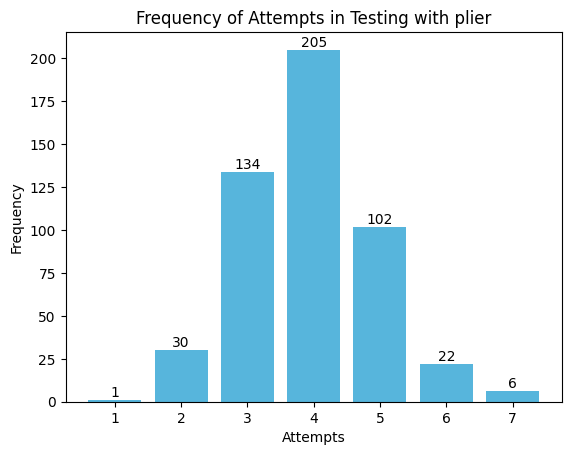

list #9 word #1: gusto
attempt: 3
list #9 word #2: steer
attempt: 5
list #9 word #3: frock
attempt: 4
list #9 word #4: turbo
attempt: 4
list #9 word #5: bland
attempt: 4
list #9 word #6: fifty
attempt: 4
list #9 word #7: newly
attempt: 4
list #9 word #8: water
attempt: 4
list #9 word #9: hyper
attempt: 4
list #9 word #10: vicar
attempt: 3
list #9 word #11: ghoul
attempt: 5
list #9 word #12: leapt
attempt: 3
list #9 word #13: spoil
attempt: 3
list #9 word #14: soggy
attempt: 4
list #9 word #15: grime
attempt: 4
list #9 word #16: radio
attempt: 5
list #9 word #17: outgo
attempt: 3
list #9 word #18: naval
attempt: 5
list #9 word #19: flush
attempt: 5
list #9 word #20: mower
attempt: 6
list #9 word #21: clump
attempt: 4
list #9 word #22: notch
attempt: 3
list #9 word #23: valid
attempt: 4
list #9 word #24: lease
attempt: 5
list #9 word #25: hippy
attempt: 3
list #9 word #26: needy
attempt: 4
list #9 word #27: groin
attempt: 3
list #9 word #28: mouse
attempt: 4
list #9 word #29: chick
attem

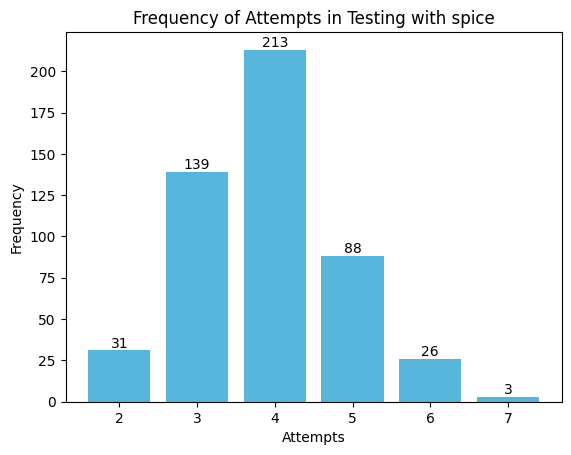

In [12]:
# Testing phase
avg_attempts = []
testing_set_size = 500  # Adjust as needed
testing_set = []
testing_set = [choose_random_word(testing_set) for _ in range(testing_set_size)]

for best_word in top_ten_words:
    testing_attempts = []
    word = 0
    the_word = None

    best_starting_word = []
    best_starting_word_attempts = float('inf')

    for target_word in testing_set:
        attempts = 0
        previous_guesses = []
        word += 1
        print(f"list #{top_ten_words.index(best_word)} word #{word}: {target_word}")

        while True:
            attempts += 1
            guess = bayesian_choose_word(possible_words, previous_guesses)
            
            if attempts == 1:
                guess = best_word
                the_word = guess
            # elif attempts == 2:
            #     the_word = guess
            
            feedback = evaluate_guess(target_word, guess)
            previous_guesses.append((guess, feedback))
            if target_word == guess:
                print(f"attempt: {attempts}")
                testing_attempts.append(attempts)
                if attempts < 3:
                    best_starting_word.append(the_word)
                    # best_starting_word_attempts = attempts
                break
    avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)
    avg_attempts.append(avg_testing_attempts)

    # Testing Data Graph
    unique_elements, counts = [], []

    for item in set(testing_attempts):
        unique_elements.append(item)
        counts.append(testing_attempts.count(item))

    plt.bar(unique_elements, counts, color='#57b5dc')

    for i, count in enumerate(counts):
        plt.text(unique_elements[i], count + 0.1, str(count), ha='center', va='bottom')

    plt.xlabel('Attempts')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Attempts in Testing with {best_word}')

    plt.show()

In [13]:
best_word = top_ten_words[int(avg_attempts.index(min(avg_attempts)))]

print(f"best_word: {best_word}")
print(f"avg_attempt for best_word: {min(avg_attempts)}")

best_word: false
avg_attempt for best_word: 3.874


In [14]:
# Print average attempts for training and testing
avg_training_attempts = sum(training_attempts) / len(training_attempts)
avg_testing_attempts = sum(testing_attempts) / len(testing_attempts)

print(f"Average attempts during training: {avg_training_attempts:.2f}")
print(f"Average attempts during testing: {min(avg_attempts):.2f}")

Average attempts during training: 4.03
Average attempts during testing: 3.87


In [15]:
# Main game loop
attempts = 0
previous_guesses = []

print("Let's Play Wordle!")
print("Please think of a word and provide feedback as follows:")
print("0 for MISS, 1 for MISPLACED, and 2 for EXACT.")

while True:
    attempts += 1
    guess = bayesian_choose_word(possible_words, previous_guesses)
    
    # First step to set the first word
    if attempts == 1: guess = best_word
    
    feedback = []
    while True:
        try:
            feedback_input = input(f"Attempt {attempts}: {guess} - Enter feedback (0/1/2): ")
            feedback_input = [int(f) for f in feedback_input]
            if all(f in [0, 1, 2] for f in feedback_input) and len(feedback_input) == 5:
                for i in range(len(feedback_input)):
                    if feedback_input[i] == 0:
                        feedback.append("⬛")
                    elif feedback_input[i] == 1:
                        feedback.append("🟨")
                    elif feedback_input[i] == 2:
                        feedback.append("🟩")
            else:
                print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        except ValueError:
            print("Invalid feedback. Please provide feedback as 0, 1, or 2.")
        if len(feedback) == len(feedback_input):
            feedback = "".join(feedback)
            break
    previous_guesses.append((guess, feedback))
    print(feedback)

    if feedback.count("🟩") == 5:
        print(f"Congratulations! The word was '{guess}'. It took {attempts} attempts to guess.")
        break

Let's Play Wordle!
Please think of a word and provide feedback as follows:
0 for MISS, 1 for MISPLACED, and 2 for EXACT.
⬛⬛🟨⬛🟨
🟨⬛🟨🟩🟩
🟩🟩🟩🟩🟩
Congratulations! The word was 'pixel'. It took 3 attempts to guess.
